In [1]:
#CS577_Project_NitiW_Demo
#Niti Wattanasirichaigoon
#A20406934
#
# Loads the trained models and test it on test images

import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
from keras import models
from skimage import color

Using TensorFlow backend.


In [43]:
# Define functions to load models and test images

def loadColorizationModels():
    model3 = models.load_model('model3.h5')
    model4 = models.load_model('model4.h5')
    return model3, model4

def predict_color(model, img_path: str):
    image = img.imread(img_path)
    Lab_col = color.rgb2lab(image)
    Lab_col = np.expand_dims(Lab_col, axis=0)
    L_col = Lab_col[:,:,:,0:1]/100
    pred_ab = model.predict(L_col)
    if type(pred_ab) == list:
        pred_ab = pred_ab[0]
    pred_Lab = np.append(Lab_col[:,:,:,0:1], pred_ab, axis=-1)[0]
    pred_Lab[:,:,1:3] *= 256
    pred_Lab[:,:,1:3] -= 128
    rgb_col = color.lab2rgb(pred_Lab)
    plt.imshow(rgb_col)
    

In [44]:
# load models (takes a couple of minutes)
#  colorizer1: Original model proposed in the main paper
#  colorizer2: Same model but without the classifier
colorizer1, colorizer2 = loadColorizationModels()

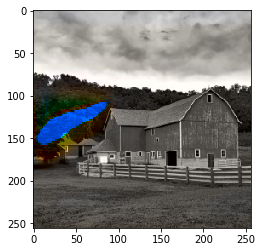

In [59]:
predict_color(colorizer1, 'test_img5.jpg')